<a href="https://colab.research.google.com/github/tux2won/self_study/blob/main/03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3Ïû• ‚Äì Î∂ÑÎ•ò**

_Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùÄ 3Ïû•Ïùò Î™®Îì† ÏÉòÌîå ÏΩîÎìúÏôÄ Ïó∞Ïäµ Î¨∏Ï†ú Ï†ïÎãµÏùÑ Îã¥Í≥† ÏûàÏäµÎãàÎã§._

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/handson-ml2/blob/master/03_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Íµ¨Í∏Ä ÏΩîÎû©ÏóêÏÑú Ïã§ÌñâÌïòÍ∏∞</a>
  </td>
</table>

# ÏÑ§Ï†ï

Î®ºÏ†Ä Î™á Í∞úÏùò Î™®ÎìàÏùÑ ÏûÑÌè¨Ìä∏Ìï©ÎãàÎã§. Îß∑ÌîåÎ°ØÎ¶Ω Í∑∏ÎûòÌîÑÎ•º Ïù∏ÎùºÏù∏ÏúºÎ°ú Ï∂úÎ†•ÌïòÎèÑÎ°ù ÎßåÎì§Í≥† Í∑∏Î¶ºÏùÑ Ï†ÄÏû•ÌïòÎäî Ìï®ÏàòÎ•º Ï§ÄÎπÑÌï©ÎãàÎã§. ÎòêÌïú ÌååÏù¥Ïç¨ Î≤ÑÏ†ÑÏù¥ 3.5 Ïù¥ÏÉÅÏù∏ÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§(ÌååÏù¥Ïç¨ 2.xÏóêÏÑúÎèÑ ÎèôÏûëÌïòÏßÄÎßå Í≥ß ÏßÄÏõêÏù¥ Ï§ëÎã®ÎêòÎØÄÎ°ú ÌååÏù¥Ïç¨ 3ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§). ÏÇ¨Ïù¥ÌÇ∑Îü∞ Î≤ÑÏ†ÑÏù¥ 0.20 Ïù¥ÏÉÅÏù∏ÏßÄÎèÑ ÌôïÏù∏Ìï©ÎãàÎã§.

In [28]:
# ÌååÏù¥Ïç¨ ‚â•3.5 ÌïÑÏàò
import sys
assert sys.version_info >= (3, 5)

# ÏÇ¨Ïù¥ÌÇ∑Îü∞ ‚â•0.20 ÌïÑÏàò
import sklearn
assert sklearn.__version__ >= "0.20"

# Í≥µÌÜµ Î™®Îìà ÏûÑÌè¨Ìä∏
import numpy as np
import os

# ÎÖ∏Ìä∏Î∂Å Ïã§Ìñâ Í≤∞Í≥ºÎ•º ÎèôÏùºÌïòÍ≤å Ïú†ÏßÄÌïòÍ∏∞ ÏúÑÌï¥
np.random.seed(42)

# ÍπîÎÅîÌïú Í∑∏ÎûòÌîÑ Ï∂úÎ†•ÏùÑ ÏúÑÌï¥
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Í∑∏Î¶ºÏùÑ Ï†ÄÏû•Ìï† ÏúÑÏπò
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Í∑∏Î¶º Ï†ÄÏû•:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST

In [29]:
# from sklearn.datasets import fetch_openml

# # MNIST Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞
# mnist = fetch_openml('mnist_784') # version=1 # as_frame=False
# mnist.keys()

In [30]:
# Í∞úÍ∞ôÏùÄ ÏÇ¨Ïù¥ÌÇ∑Îü∞ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î™ªÎ∂àÎü¨Ïò¥
# TensorFlow/KerasÎ•º Ïù¥Ïö©Ìïú MNIST Îç∞Ïù¥ÌÑ∞ Î°úÎìú

import tensorflow as tf
import numpy as np

# TensorFlow/KerasÎ•º ÏÇ¨Ïö©Ìï¥ MNIST Îç∞Ïù¥ÌÑ∞ Î°úÎìú
mnist_tf = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_tf.load_data()

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨: 2D Ïù¥ÎØ∏ÏßÄÎ•º 1D Î≤°ÌÑ∞Î°ú Î≥ÄÌôò (28x28 -> 784)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Îç∞Ïù¥ÌÑ∞ Î≥ëÌï© (ÏÇ¨Ïù¥ÌÇ∑Îü∞ ÌòïÏãùÏóê ÎßûÍ≤å Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌïòÎÇòÎ°ú Íµ¨ÏÑ±)
data = np.vstack((x_train_flat, x_test_flat))  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ (70000, 784)
target = np.hstack((y_train, y_test)).astype(str)  # Î†àÏù¥Î∏î (70000,)

# ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÎ°ú Ï†ÄÏû•
mnist = {
    "data": data,           # Îç∞Ïù¥ÌÑ∞ (28x28 Ïù¥ÎØ∏ÏßÄÎ•º ÌéºÏπú 784 Ï∞®Ïõê)
    "target": target,       # Î†àÏù¥Î∏î (Î¨∏ÏûêÏó¥ ÌòïÌÉú)
    "DESCR": "The MNIST dataset (converted from TensorFlow/Keras)",
    "feature_names": [f"pixel_{i}" for i in range(data.shape[1])],
}



mnist.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

ÏÇ¨Ïù¥ÌÇ∑Îü∞ÏóêÏÑú ÏùΩÌòÄ Îì§Ïù∏ Îç∞Ïù¥ÌÑ∞ÏÖãÎì§ÏùÄ ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÎπÑÏä∑Ìïú ÎîïÏÖîÎÑàÎ¶¨ Íµ¨Ï°∞Î•º Í∞ÄÏßÄÍ≥† ÏûàÎã§.

In [31]:
# mnist['url']

In [32]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [33]:
y.shape

(70000,)

In [34]:
28 * 28

784

Í∑∏Î¶º Ï†ÄÏû•: some_digit_plot


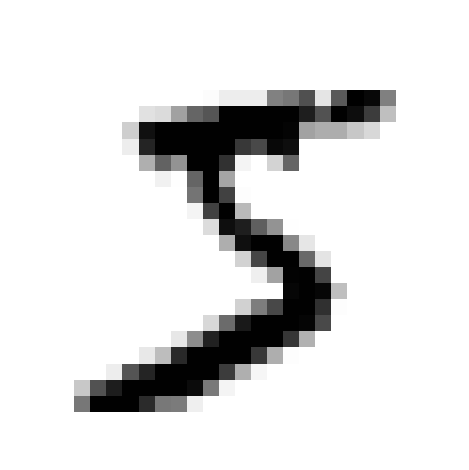

In [35]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [36]:
y[0]

'5'

In [37]:
y = y.astype(np.uint8)

In [38]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [39]:
# Ïà´Ïûê Í∑∏Î¶ºÏùÑ ÏúÑÌïú Ï∂îÍ∞Ä Ìï®Ïàò
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # n_rows = ceil(len(instances) / images_per_row) ÏôÄ ÎèôÏùºÌï©ÎãàÎã§:
    n_rows = (len(instances) - 1) // images_per_row + 1

    # ÌïÑÏöîÌïòÎ©¥ Í∑∏Î¶¨Îìú ÎÅùÏùÑ Ï±ÑÏö∞Í∏∞ ÏúÑÌï¥ Îπà Ïù¥ÎØ∏ÏßÄÎ•º Ï∂îÍ∞ÄÌï©ÎãàÎã§:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Î∞∞Ïó¥Ïùò ÌÅ¨Í∏∞Î•º Î∞îÍæ∏Ïñ¥ 28√ó28 Ïù¥ÎØ∏ÏßÄÎ•º Îã¥ÏùÄ Í∑∏Î¶¨ÎìúÎ°ú Íµ¨ÏÑ±Ìï©ÎãàÎã§:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Ï∂ï 0(Ïù¥ÎØ∏ÏßÄ Í∑∏Î¶¨ÎìúÏùò ÏàòÏßÅÏ∂ï)Í≥º 2(Ïù¥ÎØ∏ÏßÄÏùò ÏàòÏßÅÏ∂ï)Î•º Ìï©ÏπòÍ≥† Ï∂ï 1Í≥º 3(Îëê ÏàòÌèâÏ∂ï)ÏùÑ Ìï©Ïπ©ÎãàÎã§.
    # Î®ºÏ†Ä transpose()Î•º ÏÇ¨Ïö©Ìï¥ Í≤∞Ìï©ÌïòÎ†§Îäî Ï∂ïÏùÑ ÏòÜÏúºÎ°ú Ïù¥ÎèôÌïú Îã§Ïùå Ìï©Ïπ©ÎãàÎã§:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # ÌïòÎÇòÏùò ÌÅ∞ Ïù¥ÎØ∏ÏßÄÎ•º ÏñªÏóàÏúºÎØÄÎ°ú Ï∂úÎ†•ÌïòÎ©¥ Îê©ÎãàÎã§:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Í∑∏Î¶º Ï†ÄÏû•: more_digits_plot


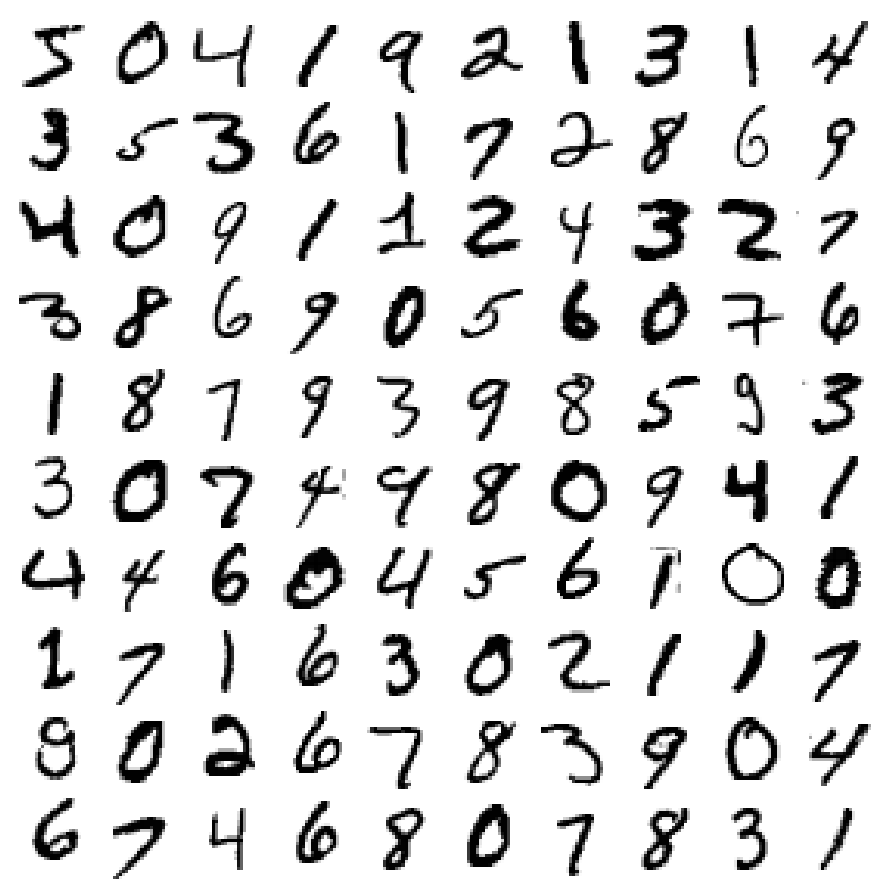

In [40]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [41]:
y[0]

5

In [42]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Ïù¥ÏßÑ Î∂ÑÎ•òÍ∏∞ ÌõàÎ†®

ÏòàÏãúÎ°ú, 'Ïà´Ïûê5-Î∂ÑÎ•òÍ∏∞'Î•º ÎßåÎì§Ïñ¥Î≥¥Ïûê


*   5Î©¥ -> True
*   5Í∞Ä ÏïÑÎãàÎ©¥ -> False



In [43]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

**ÎÖ∏Ìä∏**: `max_iter`ÏôÄ `tol` Í∞ôÏùÄ ÏùºÎ∂Ä Îß§Í∞úÎ≥ÄÏàòÎäî ÏÇ¨Ïù¥ÌÇ∑Îü∞ Îã§Ïùå Î≤ÑÏ†ÑÏóêÏÑú Í∏∞Î≥∏Í∞íÏù¥ Î∞îÎÄùÎãàÎã§. Î≤ÑÏ†ÑÏù¥ ÏóÖÎç∞Ïù¥Ìä∏ÎêòÎçîÎùºÎèÑ Í≤∞Í≥ºÍ∞Ä Î∞îÎÄåÏßÄ ÏïäÎèÑÎ°ù ÏïÑÏòà ÎÇòÏ§ëÏóê Î∞îÎÄî Í∏∞Î≥∏Í∞íÏùÑ ÏÇ¨Ïö©Ìï¥ Î™ÖÏãúÏ†ÅÏúºÎ°ú ÏßÄÏ†ïÌïòÍ≤†ÏäµÎãàÎã§. Î≤àÍ±∞Î°úÏõÄÏùÑ ÌîºÌïòÍ∏∞ ÏúÑÌï¥ Ï±ÖÏóêÎäî Îî∞Î°ú ÌëúÏãúÌïòÏßÄ ÏïäÏïòÏäµÎãàÎã§.

In [44]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [45]:
sgd_clf.predict([some_digit]) # ÏïÑÍπå ÏúÑÏóêÏÑú ÌôïÏù∏ÌñàÎçò Îß® Ï≤´Î≤àÏß∏ ÏÉòÌîåÏù¥ 5ÏòÄÍ≥†, TrueÍ∞Ä ÎÇòÏò§ÎãàÍπå ÎßûÎäî ÏòàÏ∏°ÏûÑÏùÑ Ïïå Ïàò ÏûàÏùå

array([ True])

In [46]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

# ÏÑ±Îä• Ï∏°Ï†ï

## ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÏÇ¨Ïö©Ìïú Ï†ïÌôïÎèÑ Ï∏°Ï†ï

In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# shuffle=FalseÍ∞Ä Í∏∞Î≥∏Í∞íÏù¥Í∏∞ ÎïåÎ¨∏Ïóê random_stateÎ•º ÏÇ≠Ï†úÌïòÎçòÏßÄ shuffle=TrueÎ°ú ÏßÄÏ†ïÌïòÎùºÎäî Í≤ΩÍ≥†Í∞Ä Î∞úÏÉùÌï©ÎãàÎã§.
# 0.24Î≤ÑÏ†ÑÎ∂ÄÌÑ∞Îäî ÏóêÎü¨Í∞Ä Î∞úÏÉùÌï† ÏòàÏ†ïÏù¥ÎØÄÎ°ú Ìñ•ÌõÑ Î≤ÑÏ†ÑÏùÑ ÏúÑÌï¥ shuffle=TrueÏùÑ ÏßÄÏ†ïÌï©ÎãàÎã§.
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
cross_val_score(sgd_clf, X_train, y_train_5, cv=skfolds)

# for train_index, test_index in skfolds.split(X_train, y_train_5):
#     clone_clf = clone(sgd_clf)
#     X_train_folds = X_train[train_index]
#     y_train_folds = y_train_5[train_index]
#     X_test_fold = X_train[test_index]
#     y_test_fold = y_train_5[test_index]

#     clone_clf.fit(X_train_folds, y_train_folds)
#     y_pred = clone_clf.predict(X_test_fold)
#     n_correct = sum(y_pred == y_test_fold)
#     print(n_correct / len(y_pred))

array([0.9669 , 0.91625, 0.96785])

Ïù¥Í≤å Ï†ïÌôïÎèÑÍ∞Ä ÎÜíÍ≤å ÎÇòÏò§Îäî Í≤É Í∞ôÍ∏¥ ÌïúÎç∞ Ï¢ãÏùÄ Î™®Îç∏ÏùÄ ÏïÑÎãò


Í∑∏ Ïù¥Ïú† ÏïÑÎûò Ï∞∏Í≥†

In [48]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [49]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

Ïù¥ÎØ∏ÏßÄÏùò 10% Ï†ïÎèÑÎ∞ñÏóê Ïà´Ïûê 5Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê Î¨¥Ï°∞Í±¥ '5 ÏïÑÎãò'ÏúºÎ°ú ÏòàÏ∏°ÌïòÍ∏∞Îßå Ìï¥ÎèÑ ÎßûÏ∂ú ÌôïÎ•†Ïù¥ 90%Ïù¥ÏÉÅÏù¥Îùº Í∑∏Î†áÎã§ (Ï¢ãÏùÄ Î™®Îç∏ X)

'Î∂àÍ∑†ÌòïÌïú ÌÅ¥ÎûòÏä§'Ïùò Î¨∏Ï†ú

ÎÖ∏Ìä∏: Ïù¥ Ï∂úÎ†•(Í∑∏Î¶¨Í≥† Ïù¥ ÎÖ∏Ìä∏Î∂ÅÍ≥º Îã§Î•∏ ÎÖ∏Ìä∏Î∂ÅÏùò Ï∂úÎ†•)Ïù¥ Ï±ÖÏùò ÎÇ¥Ïö©Í≥º Ï°∞Í∏à Îã§Î•º Ïàò ÏûàÏäµÎãàÎã§. Í±±Ï†ïÌï† ÌïÑÏöî ÏóÜÏäµÎãàÎã§. Í¥úÏ∞ÆÏäµÎãàÎã§! Îã¨ÎùºÏßÄÎäî Ïù¥Ïú†Í∞Ä Î™áÍ∞ÄÏßÄ ÏûàÏäµÎãàÎã§:

* Ï≤´Ïß∏, ÏÇ¨Ïù¥ÌÇ∑Îü∞Í≥º Îã§Î•∏ ÎùºÏù¥Î∏åÎü¨Î¶¨Îì§Ïù¥ Î∞úÏ†ÑÌïòÎ©¥ÏÑú ÏïåÍ≥†Î¶¨Ï¶òÏù¥ Ï°∞Í∏àÏî© Î≥ÄÍ≤ΩÎêòÍ∏∞ ÎïåÎ¨∏Ïóê ÏñªÏñ¥ÏßÄÎäî Í≤∞Í¥èÍ∞íÏù¥ Î∞îÎÄî Ïàò ÏûàÏäµÎãàÎã§. ÏµúÏã† ÏÇ¨Ïù¥ÌÇ∑Îü∞ Î≤ÑÏ†ÑÏùÑ ÏÇ¨Ïö©ÌïúÎã§Î©¥(ÏùºÎ∞òÏ†ÅÏúºÎ°ú Í∂åÏû•Îê©ÎãàÎã§) Ï±ÖÏù¥ÎÇò Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùÑ ÎßåÎì§ Îïå ÏÇ¨Ïö©Ìïú Î≤ÑÏ†ÑÍ≥º Îã§Î•º Í≤ÉÏù¥ÎØÄÎ°ú Ï∞®Ïù¥Í∞Ä ÎÇ©ÎãàÎã§. ÎÖ∏Ìä∏Î∂ÅÏùÄ ÏµúÏã†ÏúºÎ°ú ÏóÖÎç∞Ïù¥Ìä∏ÌïòÎ†§Í≥† ÎÖ∏Î†•ÌïòÏßÄÎßå Ï±ÖÏùò ÎÇ¥Ïö©ÏùÄ Í∑∏Î†áÍ≤å Ìï† Ïàò ÏóÜÏäµÎãàÎã§.
* ÎëòÏß∏, ÎßéÏùÄ ÌõàÎ†® ÏïåÍ≥†Î¶¨Ï¶òÏùÄ ÌôïÎ•†Ï†ÅÏûÖÎãàÎã§. Ï¶â Î¨¥ÏûëÏúÑÏÑ±Ïóê ÏùòÏ°¥Ìï©ÎãàÎã§. Ïù¥Î°†Ï†ÅÏúºÎ°ú ÏùòÏÇ¨ ÎÇúÏàòÎ•º ÏÉùÏÑ±ÌïòÎèÑÎ°ù ÎÇúÏàú ÏÉùÏÑ±Í∏∞Ïóê ÏãúÎìú Í∞íÏùÑ ÏßÄÏ†ïÌïòÏó¨ ÏùºÍ¥ÄÎêú Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏäµÎãàÎã§(random_state=42ÎÇò np.random.seed(42)Î•º Ï¢ÖÏ¢Ö Î≥¥Í≤å ÎêòÎäî Ïù¥Ïú†ÏûÖÎãàÎã§). ÌïòÏßÄÎßå Ïó¨Í∏∞ÏóêÏÑú Ïñ∏Í∏âÌïú Îã§Î•∏ ÏöîÏù∏ÏúºÎ°ú Ïù∏Ìï¥ Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏùÑ ÎïåÍ∞Ä ÏûàÏäµÎãàÎã§.
* ÏÑ∏Ïß∏, ÌõàÎ†® ÏïåÍ≥†Î¶¨Ï¶òÏù¥ Ïó¨Îü¨ Ïä§Î†àÎìú(CÎ°ú Íµ¨ÌòÑÎêú ÏïåÍ≥†Î¶¨Ï¶ò)ÎÇò Ïó¨Îü¨ ÌîÑÎ°úÏÑ∏Ïä§(ÏòàÎ•º Îì§Ïñ¥ n_jobs Îß§Í∞úÎ≥ÄÏàòÎ•º ÏÇ¨Ïö©Ìï† Îïå)Î°ú Ïã§ÌñâÎêòÎ©¥ Ïó∞ÏÇ∞Ïù¥ Ïã§ÌñâÎêòÎäî Ï†ïÌôïÌïú ÏàúÏÑúÍ∞Ä Ìï≠ÏÉÅ Î≥¥Ïû•ÎêòÏßÄ ÏïäÏäµÎãàÎã§. Îî∞ÎùºÏÑú Í≤∞Í¥èÍ∞íÏù¥ Ï°∞Í∏à Îã§Î•º Ïàò ÏûàÏäµÎãàÎã§.
* ÎßàÏßÄÎßâÏúºÎ°ú, Ïó¨Îü¨ ÏÑ∏ÏÖòÏóê Í≤∞Ï≥ê ÏàúÏÑúÍ∞Ä Î≥¥Ïû•ÎêòÏßÄ ÏïäÎäî ÌååÏù¥Ïç¨ ÎîïÏÖîÎÑàÎ¶¨(dict)Ïù¥ÎÇò ÏÖã(set) Í∞ôÏùÄ Í≤ÉÏùÄ ÏôÑÎ≤ΩÌïú Ïû¨ÌòÑÏÑ±Ïù¥ Î∂àÍ∞ÄÎä•Ìï©ÎãàÎã§. ÎòêÌïú ÎîîÎ†âÌÜ†Î¶¨ ÏïàÏóê ÏûàÎäî ÌååÏùºÏùò ÏàúÏÑúÎèÑ Î≥¥Ïû•ÎêòÏßÄ ÏïäÏäµÎãàÎã§.

## Ïò§Ï∞® ÌñâÎ†¨

In [50]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) # Í≤ΩÏÇ¨ÌïòÍ∞ïÎ≤ïÏúºÎ°ú, ÍµêÏ∞® Í≤ÄÏ¶ù Í≥ºÏ†ïÏùÑ Í±∞ÏπòÎ©¥ÏÑú ÌïôÏäµÏãúÌÇ¥

In [51]:
from sklearn.metrics import confusion_matrix

# confusion_matrix = Ïò§Ï∞® ÌñâÎ†¨
# Ïò§Ï∞®Ïùò Í∞úÏàò

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [52]:
y_train_perfect_predictions = y_train_5  # ÏôÑÎ≥ÄÌïúÏ≤ô ÌïòÏûê
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

## Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®

In [53]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [54]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [55]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [56]:
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

In [57]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [58]:
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

## Ï†ïÎ∞ÄÎèÑ/Ïû¨ÌòÑÏú® Ìä∏Î†àÏù¥ÎìúÏò§ÌîÑ

In [59]:
y_scores = sgd_clf.decision_function([some_digit]) # Ïù¥Î≤àÏóî 'Í≤∞Ï†ï Ìï®Ïàò' Î∂ÑÎ•òÍ∏∞Î•º ÏÇ¨Ïö©
y_scores

array([2164.22030239])

In [60]:
threshold = 0 # ÏûÑÍ≥óÍ∞í: Î≥¥Îã§ ÌÅ¨Î©¥ ÏñëÏÑ± ÌÅ¥ÎûòÏä§, ÎÇÆÏúºÎ©¥ ÏùåÏÑ± ÌÅ¥ÎûòÏä§Î°ú Î∂ÑÎ•ò

y_some_digit_pred = (y_scores > threshold)

In [61]:
y_some_digit_pred

array([ True])

In [62]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

ÏûÑÍ≥óÍ∞í Ï¶ùÍ∞Ä


*   Ï†ïÎ∞ÄÎèÑ ÏÉÅÏäπ
*   Ïû¨ÌòÑÏú® ÌïòÎùΩ

ÏûÑÍ≥óÍ∞í Í∞êÏÜå


*   Ï†ïÎ∞ÄÎèÑ ÌïòÎùΩ
*   Ïû¨ÌòÑÏú® ÏÉÅÏäπ






In [63]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

Îëê ÏÑ∏Ìä∏ÏóêÏÑú ÌõàÎ†®ÏùÑ ÌïòÍ≥†, ÎÇòÎ®∏ÏßÄ Ìïú ÏÑ∏Ìä∏ÏóêÏÑú Í≤ÄÏ¶ùÏùÑ ÌïòÎèÑÎ°ù, ÌõàÎ†® ÏÖãÏïàÏóêÏÑú ÏûêÏ≤¥Ï†ÅÏúºÎ°ú ÌõàÎ†®-ÌÖåÏä§Ìä∏Î•º Í±∞Îì≠ÌïòÎèÑÎ°ù ÌïúÎã§.

Ï∞êÏµúÏ¢Ö ÌÖåÏä§Ìä∏ÏÖãÏùÄ Ï†ïÎßê Î™®Îì† Î™®Îç∏ ÌïôÏäµÏù¥ ÎÅùÎÇú ÌõÑÏóê Ìé∏Ìñ•ÏùÑ Ï£ºÏßÄ ÏïäÎèÑÎ°ù ÏµúÎåÄÌïú Î≥¥Ï°¥ÌïúÎã§Îäî Í∞úÎÖêÏúºÎ°ú Ïù¥Ìï¥ÌïòÏûê

Ï†ïÎ∞ÄÎèÑ(precision)-Ïû¨ÌòÑÏú®(recall)Í≥°ÏÑ†

In [64]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5 , y_scores) # (Ïã§Ï†úÍ∞í, ÏòàÏ∏°Í∞í)

Í∑∏Î¶º Ï†ÄÏû•: precision_recall_vs_threshold_plot


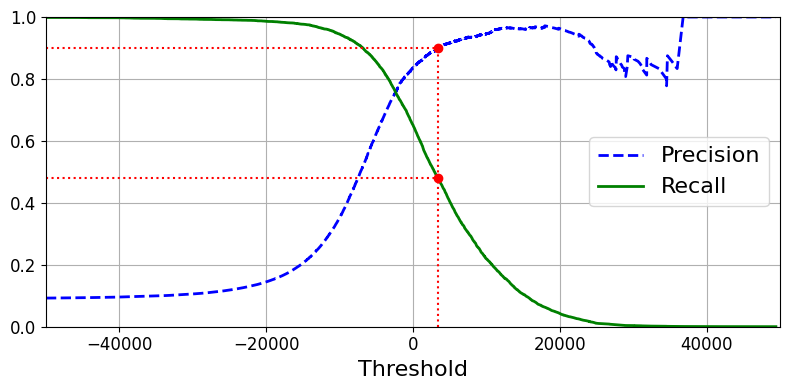

In [65]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2) # Ï†ïÎ∞ÄÎèÑ - xÏ∂ï
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2) # Ïû¨ÌòÑÏú® - yÏ∂ï

    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [66]:
(y_train_pred == (y_scores > 0)).all()

True

Í∑∏Î¶º Ï†ÄÏû•: precision_vs_recall_plot


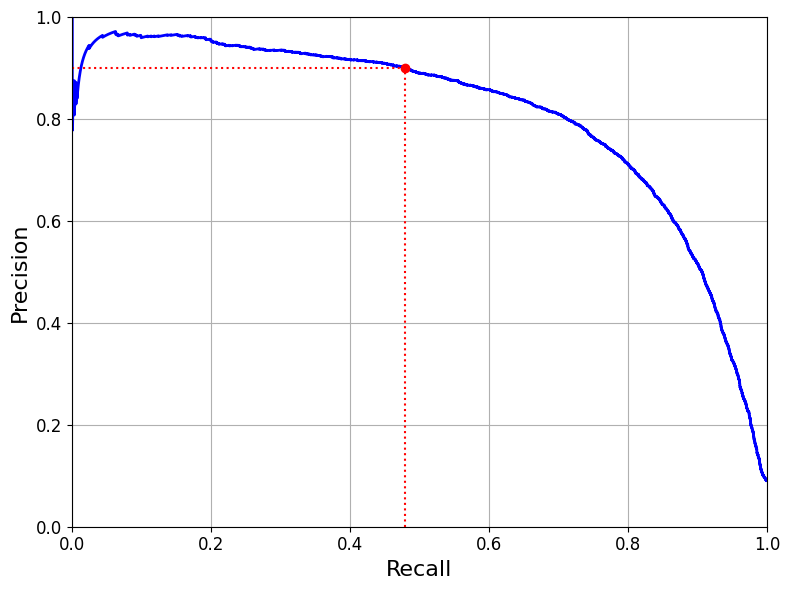

0.8100417627526462

In [67]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

# Í≥°ÏÑ†Ïùò ÏïÑÎûò Î©¥Ï†ÅÏù¥ ÌÅ¥ÏàòÎ°ù Ï¢ãÏùÄ Î™®Îç∏
from sklearn.metrics import average_precision_score
average_precision_score(y_train_5, y_scores)

In [68]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [69]:
threshold_90_precision

3370.0194991439557

In [70]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [71]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [72]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

## ROC Í≥°ÏÑ†

In [73]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Í∑∏Î¶º Ï†ÄÏû•: roc_curve_plot


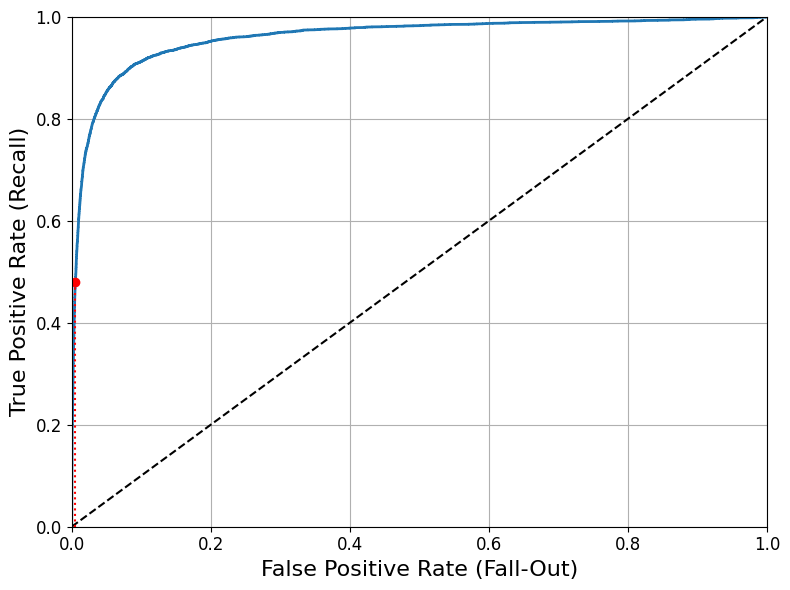

In [74]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # ÎåÄÍ∞Å Ï†êÏÑ†
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [75]:
from sklearn.metrics import roc_auc_score

# ROC Í≥°ÏÑ† ÏïÑÎûò Î©¥Ï†Å Í≥ÑÏÇ∞
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

**ÎÖ∏Ìä∏**: ÏÇ¨Ïù¥ÌÇ∑Îü∞ 0.22 Î≤ÑÏ†ÑÏóêÏÑú Î∞îÎÄî Í∏∞Î≥∏ Í∞íÏùÑ ÏÇ¨Ïö©Ìï¥ `n_estimators=100`Î°ú ÏßÄÏ†ïÌï©ÎãàÎã§.

In [76]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [77]:
y_scores_forest = y_probas_forest[:, 1] # Ï†êÏàò = ÏñëÏÑ± ÌÅ¥ÎûòÏä§Ïùò ÌôïÎ•†
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Í∑∏Î¶º Ï†ÄÏû•: roc_curve_comparison_plot


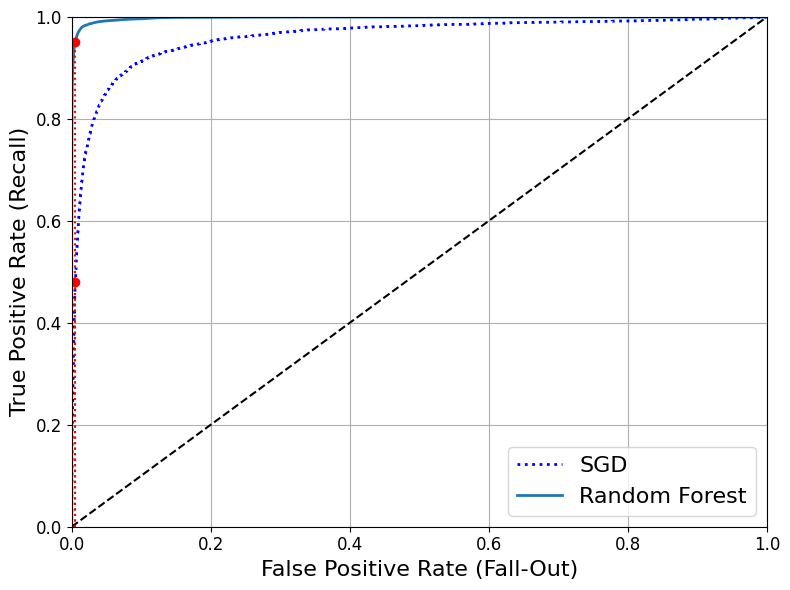

In [78]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD") # ÏñòÎäî sgdÎ°ú Ï∞çÏñ¥Î≥¥Í≥†
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest") # ÏñòÎäî ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏Î°ú
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [79]:
print(roc_auc_score(y_train_5, y_scores_forest)) # ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏
print(roc_auc_score(y_train_5, y_scores)) # SGD classifier Î™®Îç∏

# Ïó≠Ïãú ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏Í∞Ä Îçî ÎÜíÍ≤å ÎÇòÏò¥ÏùÑ Ïïå Ïàò ÏûàÎã§.

0.9983436731328145
0.9604938554008616


In [80]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3) # ÍµêÏ∞® 3ÏúºÎ°ú ÌïòÏó¨ ÍµêÏ∞® Í≤ÄÏ¶ù Î∞è ÏòàÏ∏°Í∞í Ï∂úÎ†•

precision_score(y_train_5, y_train_pred_forest)
recall_score(y_train_5, y_train_pred_forest)
# Ìï¥Îãπ Î™®Îç∏ ÏòàÏ∏°Í≤∞Í≥ºÏôÄ Ïã§Ï†úÍ∞í ÎπÑÍµêÌïòÏó¨ "Ï†ïÎ∞ÄÎèÑ"ÏôÄ "Ïû¨ÌòÑÏú®" ÌôïÏù∏
# ÏïÑÍπå SGD classifierÎ°ú ÌõàÎ†®ÏãúÏº∞ÏùÑ Îïå 0.8370, 0.6511 ÎÇòÏò§ÎçòÍ±∞Ïóê ÎπÑÌï¥ Ï¶ùÍ∞ÄÌï®!

0.8662608374838591

# Îã§Ï§ë Î∂ÑÎ•ò

In [81]:
from sklearn.svm import SVC


# Î¶¨ÎßàÏù∏Îìú
# ome_digit = X[0]
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï≤´Î≤àÏß∏ Í∞í ÏÉòÌîå

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train_5Ïù¥ ÏïÑÎãàÎùº y_trainÏûÖÎãàÎã§ # Îã§Ï§ëÎ∂ÑÎ•òÎãàÍπå!
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [82]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [83]:
np.argmax(some_digit_scores)

5

In [84]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [85]:
svm_clf.classes_[5]

5

In [86]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [87]:
len(ovr_clf.estimators_)

10

ÌïúÌé∏, ÏúÑÏóêÏÑú ÌñàÎçò SGD ClassifierÎèÑ Îã§Ï§ë Î∂ÑÎ•ò Í∏∞Îä•ÏùÑ Ï†úÍ≥µ.
Í∑∏ÎåÄÎ°ú inputÍ∞íÎßå ÏÑ§Ï†ïÌï¥Ï£ºÎ©¥ ÏòàÏ∏°Í∞íÏùÑ Î∞òÌôòÌïúÎã§

In [88]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

some_difitÎäî ÌÅ¥ÎûòÏä§ 5Ïù∏Îç∞ 3Ïù¥ÎùºÍ≥† Î∂ÑÎ•òÌïú Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. ÏûòÌïôÏäµÌïòÏßÑ ÏïäÏùÄ ÎìØÌïòÎã§.

In [89]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

**Í≤ΩÍ≥†**: ÏÇ¨Ïö©ÌïòÎäî ÌïòÎìúÏõ®Ïñ¥Ïóê Îî∞Îùº Îã§Ïùå Îëê ÏÖÄÏùÑ Ïã§ÌñâÌïòÎäîÎç∞ 30Î∂Ñ ÎòêÎäî Í∑∏ Ïù¥ÏÉÅ Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§.

In [90]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

Í∑∏Î†áÎã§Î©¥ "Ïä§ÏºÄÏùºÎßÅ"ÏùÑ Ìï¥ÏÑú Ìï¥Î≥¥Ïûê!!

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

# ÏóêÎü¨ Î∂ÑÏÑù

In [92]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

ÏÇ¨Ïù¥ÌÇ∑Îü∞ 0.22 Î≤ÑÏ†ÑÎ∂ÄÌÑ∞Îäî `sklearn.metrics.plot_confusion_matrix()` Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [93]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Í∑∏Î¶º Ï†ÄÏû•: confusion_matrix_plot


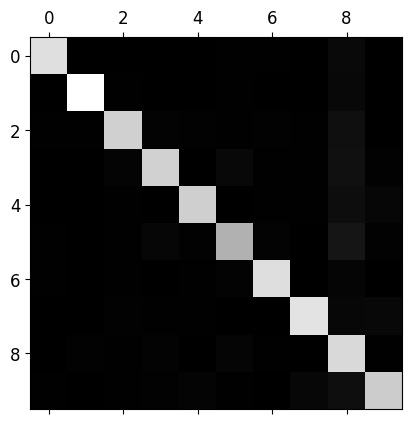

In [94]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [95]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Í∑∏Î¶º Ï†ÄÏû•: confusion_matrix_errors_plot


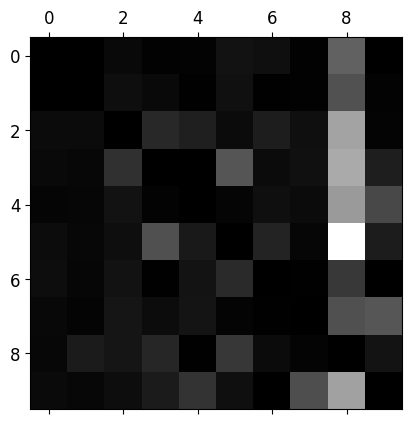

In [96]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

In [97]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

Í∑∏Î¶º Ï†ÄÏû•: error_analysis_digits_plot


# Îã§Ï§ë Î†àÏù¥Î∏î Î∂ÑÎ•ò

In [98]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [99]:
knn_clf.predict([some_digit])

array([[False,  True]])

**Í≤ΩÍ≥†**: Îã§Ïùå ÏÖÄÏùÄ Ïã§ÌñâÌïòÎäîÎç∞ Îß§Ïö∞ Ïò§Îûò Í±∏Î¶ΩÎãàÎã§(ÌïòÎìúÏõ®Ïñ¥Ïóê Îî∞Îùº Î™á ÏãúÍ∞ÑÏù¥ Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§).

In [100]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

# Îã§Ï§ë Ï∂úÎ†• Î∂ÑÎ•ò

In [101]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Í∑∏Î¶º Ï†ÄÏû•: noisy_digit_example_plot


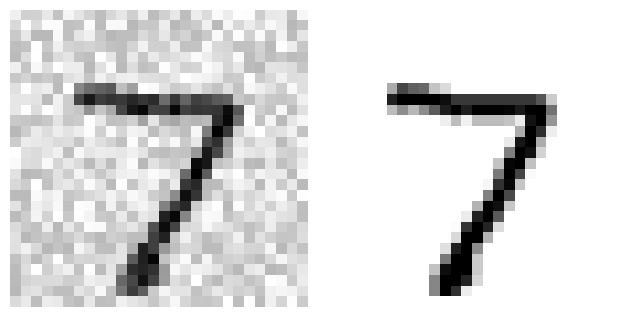

In [102]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

Í∑∏Î¶º Ï†ÄÏû•: cleaned_digit_example_plot


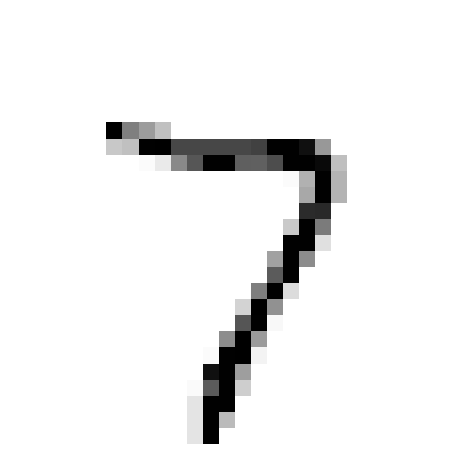

In [103]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")

# Ï∂îÍ∞Ä ÎÇ¥Ïö©

## ÎçîÎØ∏ (Ï¶â ÎûúÎç§) Î∂ÑÎ•òÍ∏∞

In [104]:
from sklearn.dummy import DummyClassifier
# 0.24Î≤ÑÏ†ÑÎ∂ÄÌÑ∞ strategyÏùò Í∏∞Î≥∏Í∞íÏù¥ 'stratified'ÏóêÏÑú 'prior'Î°ú Î∞îÎÄåÎØÄÎ°ú Î™ÖÏãúÏ†ÅÏúºÎ°ú ÏßÄÏ†ïÌï©ÎãàÎã§.
dmy_clf = DummyClassifier(strategy='prior')
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]

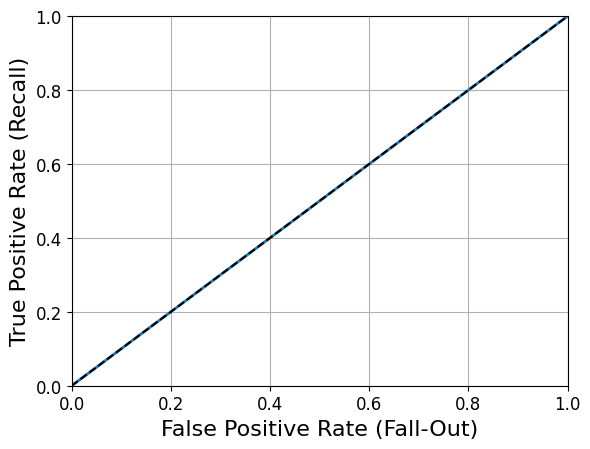

In [105]:
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr, tprr)

## KNN Î∂ÑÎ•òÍ∏∞

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [107]:
y_knn_pred = knn_clf.predict(X_test)

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

<ipython-input-109-d24610df8b88>:1: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


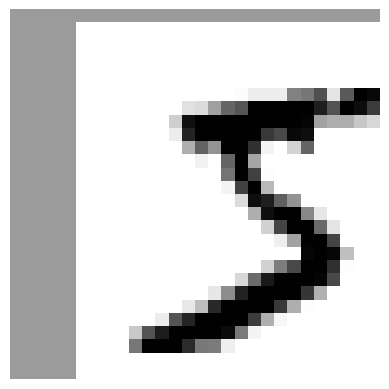

In [109]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [110]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

In [111]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_knn_expanded_pred)

In [ ]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

In [ ]:
plot_digit(ambiguous_digit)

# Ïó∞ÏäµÎ¨∏Ï†ú Ìï¥Îãµ

## 1. 97% Ï†ïÌôïÎèÑÏùò MNIST Î∂ÑÎ•òÍ∏∞

**Í≤ΩÍ≥†**: ÏÇ¨Ïö©ÌïòÎäî ÌïòÎìúÏõ®Ïñ¥Ïóê Îî∞Îùº Îã§Ïùå ÏÖÄÏùÑ Ïã§ÌñâÌïòÎäîÎç∞ 16ÏãúÍ∞Ñ ÎòêÎäî Í∑∏ Ïù¥ÏÉÅ Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

## 2. Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãù

In [ ]:
from scipy.ndimage.interpolation import shift

In [ ]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [ ]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [ ]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [ ]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [ ]:
knn_clf.fit(X_train_augmented, y_train_augmented)

**Í≤ΩÍ≥†**: ÏÇ¨Ïö©ÌïòÎäî ÌïòÎìúÏõ®Ïñ¥Ïóê Îî∞Îùº Îã§Ïùå ÏÖÄÏùÑ Ïã§ÌñâÌïòÎäîÎç∞ 1ÏãúÍ∞Ñ ÎòêÎäî Í∑∏ Ïù¥ÏÉÅ Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

Í∞ÑÎã®Ìûà Îç∞Ïù¥ÌÑ∞Î•º Ï¶ùÏãùÌï¥ÏÑú 0.5% Ï†ïÌôïÎèÑÎ•º ÎÜíÏòÄÏäµÎãàÎã§. :)

## 3. ÌÉÄÏù¥ÌÉÄÎãâ Îç∞Ïù¥ÌÑ∞ÏÖã ÎèÑÏ†Ñ

ÏäπÍ∞ùÏùò ÎÇòÏù¥, ÏÑ±Î≥Ñ, ÏäπÍ∞ù Îì±Í∏â, ÏäπÏÑ† ÏúÑÏπò Í∞ôÏùÄ ÏÜçÏÑ±ÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌïòÏó¨ ÏäπÍ∞ùÏùò ÏÉùÏ°¥ Ïó¨Î∂ÄÎ•º ÏòàÏ∏°ÌïòÎäî Í≤ÉÏù¥ Î™©ÌëúÏûÖÎãàÎã§.

Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌï¥ Î≥¥Ï£†:

In [ ]:
import os
import urllib.request

TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/datasets/titanic/"

def fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading", filename)
            urllib.request.urlretrieve(url + filename, filepath)

fetch_titanic_data()

In [ ]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [ ]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

Îç∞Ïù¥ÌÑ∞Îäî Ïù¥ÎØ∏ ÌõàÎ†® ÏÑ∏Ìä∏ÏôÄ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î°ú Î∂ÑÎ¶¨ÎêòÏñ¥ ÏûàÏäµÎãàÎã§. Í∑∏Îü¨ÎÇò ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî Î†àÏù¥Î∏îÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏßÄ ÏïäÏäµÎãàÎã§: ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÏó¨ Í∞ÄÎä•Ìïú ÏµúÍ≥†Ïùò Î™®Îç∏ÏùÑ ÎßåÎì§Í≥† ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°ÏùÑ Ï∫êÍ∏Ä(Kaggle)Ïóê ÏóÖÎ°úÎìúÌïòÏó¨ ÏµúÏ¢Ö Ï†êÏàòÎ•º ÌôïÏù∏ÌïòÎäî Í≤ÉÏù¥ Î™©ÌëúÏûÖÎãàÎã§.

ÌõàÎ†® ÏÑ∏Ìä∏ÏóêÏÑú Îß® ÏúÑ Î™á Í∞úÏùò Ïó¥ÏùÑ ÏÇ¥Ìé¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
train_data.head()

ÏÜçÏÑ±ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏùòÎØ∏Î•º Í∞ÄÏßëÎãàÎã§:
* **PassengerId**: Í∞Å ÏäπÍ∞ùÏùò Í≥†Ïú† ÏãùÎ≥ÑÏûê.
* **Survived**: ÌÉÄÍπÉÏûÖÎãàÎã§. 0ÏùÄ ÏÉùÏ°¥ÌïòÏßÄ Î™ªÌïú Í≤ÉÏù¥Í≥† 1ÏùÄ ÏÉùÏ°¥ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
* **Pclass**: ÏäπÍ∞ù Îì±Í∏â. 1, 2, 3Îì±ÏÑù.
* **Name**, **Sex**, **Age**: Ïù¥Î¶Ñ Í∑∏ÎåÄÎ°ú ÏùòÎØ∏ÏûÖÎãàÎã§.
* **SibSp**: Ìï®Íªò ÌÉëÏäπÌïú ÌòïÏ†ú, Î∞∞Ïö∞ÏûêÏùò Ïàò.
* **Parch**: Ìï®Íªò ÌÉëÏäπÌïú ÏûêÎÖÄ, Î∂ÄÎ™®Ïùò Ïàò.
* **Ticket**: Ìã∞Ïºì ÏïÑÏù¥Îîî
* **Fare**: Ìã∞Ïºì ÏöîÍ∏à (ÌååÏö¥Îìú)
* **Cabin**: Í∞ùÏã§ Î≤àÌò∏
* **Embarked**: ÏäπÍ∞ùÏù¥ ÌÉëÏäπÌïú Í≥≥. C(Cherbourg), Q(Queenstown), S(Southampton)

`PassengerId` Ïó¥ÏùÑ Ïù∏Îç±Ïä§ Ïó¥Î°ú ÏßÄÏ†ïÌïòÍ≤†ÏäµÎãàÎã§:

In [ ]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏñºÎßàÎÇò ÎêòÎäîÏßÄ ÏïåÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
train_data.info()

In [ ]:
train_data[train_data["Sex"]=="female"]["Age"].median()

Ï¢ãÏäµÎãàÎã§. **Age**, **Cabin**, **Embarked** ÏÜçÏÑ±Ïùò ÏùºÎ∂ÄÍ∞Ä nullÏûÖÎãàÎã§(891Í∞úÏùò non-null Î≥¥Îã§ ÏûëÏäµÎãàÎã§). ÌäπÌûà **Cabin**ÏùÄ 77%Í∞Ä nullÏûÖÎãàÎã§. ÏùºÎã® **Cabin**ÏùÄ Î¨¥ÏãúÌïòÍ≥† ÎÇòÎ®∏ÏßÄÎ•º ÌôúÏö©ÌïòÍ≤†ÏäµÎãàÎã§. **Age**Îäî 19%Í∞Ä nullÏù¥ÎØÄÎ°ú Ïù¥Î•º Ïñ¥ÎñªÍ≤å Ï≤òÎ¶¨Ìï†ÏßÄ Í≤∞Ï†ïÌï¥Ïïº Ìï©ÎãàÎã§. nullÏùÑ Ï§ëÍ∞Ñ ÎÇòÏù¥Î°ú Î∞îÍæ∏Îäî Í≤ÉÏù¥ Í¥úÏ∞ÆÏïÑ Î≥¥ÏûÖÎãàÎã§. Îã§Î•∏ Ïó¥ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÎÇòÏù¥Î•º ÏòàÏ∏°ÌïòÎäî Í≤É(ÏòàÎ•º Îì§Ïñ¥, 1Îì±ÏÑùÏùò Ï§ëÍ∞Ñ ÎÇòÏù¥Îäî 37, 2Îì±ÏÑùÏùÄ 29, 3Îì±ÏÑùÏùÄ 24ÏûÖÎãàÎã§)Ïù¥ Ï°∞Í∏à ÌòÑÎ™ÖÌï¥ Î≥¥Ïùº Ïàò ÏûàÏßÄÎßå Îã®ÏàúÌï®ÏùÑ ÏúÑÌï¥ Ï†ÑÏ≤¥Ïùò Ï§ëÍ∞Ñ ÎÇòÏù¥Î•º ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.

**Name**Í≥º **Ticket** ÏÜçÏÑ±ÎèÑ Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏßÄÎßå Î®∏Ïã†Îü¨Îãù Î™®Îç∏Ïù¥ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Ïà´ÏûêÎ°ú Î≥ÄÌôòÌïòÎäî Í≤ÉÏù¥ Ï°∞Í∏à ÍπåÎã§Î°≠ÏäµÎãàÎã§. Í∑∏ÎûòÏÑú ÏßÄÍ∏àÏùÄ Ïù¥ Îëê ÏÜçÏÑ±ÏùÑ Î¨¥ÏãúÌïòÍ≤†ÏäµÎãàÎã§.

ÌÜµÍ≥ÑÏπòÎ•º ÏÇ¥Ìé¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
train_data.describe()

* Ïù¥ÌÅ¨, 38%Îßå **Survived**ÏûÖÎãàÎã§. üò≠ Í±∞Ïùò 40%Ïóê Í∞ÄÍπåÏö∞ÎØÄÎ°ú Ï†ïÌôïÎèÑÎ•º ÏÇ¨Ïö©Ìï¥ Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌï¥ÎèÑ Í¥úÏ∞ÆÏùÑ Í≤É Í∞ôÏäµÎãàÎã§.
* ÌèâÍ∑† **Fare**Îäî 32.20 ÌååÏö¥ÎìúÎùº Í∑∏Î†áÍ≤å ÎπÑÏã∏Î≥¥Ïù¥ÏßÄÎäî ÏïäÏäµÎãàÎã§(ÏïÑÎßà ÏöîÍ∏àÏùÑ ÎßéÏù¥ Î∞òÌôòÌï¥ Ï£ºÏóàÍ∏∞ ÎïåÎ¨∏Ïùº Í≤ÉÏûÖÎãàÎã§)
* ÌèâÍ∑† **Age**Îäî 30Î≥¥Îã§ ÏûëÏäµÎãàÎã§.

ÌÉÄÍπÉÏù¥ 0Í≥º 1Î°ú Ïù¥Î£®Ïñ¥Ï°åÎäîÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§:

In [ ]:
train_data["Survived"].value_counts()

Î≤îÏ£ºÌòï ÌäπÏÑ±Îì§ÏùÑ ÌôïÏù∏Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
train_data["Pclass"].value_counts()

In [ ]:
train_data["Sex"].value_counts()

In [ ]:
train_data["Embarked"].value_counts()

**Embarked** ÌäπÏÑ±ÏùÄ ÏäπÍ∞ùÏù¥ ÌÉëÏäπÌïú Í≥≥ÏùÑ ÏïåÎ†§ Ï§çÎãàÎã§: C=Cherbourg, Q=Queenstown, S=Southampton.

ÏàòÏπò ÌäπÏÑ±ÏùÑ ÏúÑÌïú ÌååÏù¥ÌîÑÎùºÏù∏Î∂ÄÌÑ∞ ÏãúÏûëÌï¥ÏÑú Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÎßåÎì§Ïñ¥ Î≥¥Ï£†:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

Ïù¥Ï†ú Î≤îÏ£ºÌòï ÌäπÏÑ±ÏùÑ ÏúÑÌïú ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÎßåÎì≠ÎãàÎã§:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

ÎßàÏßÄÎßâÏúºÎ°ú Ïà´ÏûêÏôÄ Î≤îÏ£ºÌòï ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ Ïó∞Í≤∞Ìï©ÎãàÎã§:

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

Ï¢ãÏäµÎãàÎã§! Ïù¥Ï†ú ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º Î∞õÏïÑ Î®∏Ïã†Îü¨Îãù Î™®Îç∏Ïóê Ï£ºÏûÖÌï† Ïà´Ïûê ÏûÖÎ†• ÌäπÏÑ±ÏùÑ Ï∂úÎ†•ÌïòÎäî Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÎßåÎì§ÏóàÏäµÎãàÎã§.

In [ ]:
X_train = preprocess_pipeline.fit_transform(
    train_data[num_attribs + cat_attribs])
X_train

Î†àÏù¥Î∏îÏùÑ Í∞ÄÏ†∏ÏòµÎãàÎã§:

In [ ]:
y_train = train_data["Survived"]

Ïù¥Ï†ú Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®ÏãúÌÇ¨ Ï∞®Î°ÄÏûÖÎãàÎã§. Î®ºÏ†Ä `RandomForestClassifier`Î•º ÏÇ¨Ïö©Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

Î™®Îç∏Ïù¥ Ïûò ÌõàÎ†®Îêú Í≤É Í∞ôÏäµÎãàÎã§. Ïù¥Î•º ÏÇ¨Ïö©Ìï¥ÏÑú ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïóê ÎåÄÌïú ÏòàÏ∏°ÏùÑ ÎßåÎì≠ÎãàÎã§:

In [ ]:
X_test = preprocess_pipeline.transform(test_data[num_attribs + cat_attribs])
y_pred = forest_clf.predict(X_test)

Ïù¥ ÏòàÏ∏° Í≤∞Í≥ºÎ•º (Ï∫êÍ∏ÄÏóêÏÑú Í∏∞ÎåÄÌïòÎäî ÌòïÌÉúÏù∏) CSV ÌååÏùºÎ°ú ÎßåÎì§Ïñ¥ ÏóÖÎ°úÎìúÌïòÍ≥† ÌèâÍ∞ÄÎ•º Î∞õÏïÑÎ≥º Ïàò ÏûàÏäµÎãàÎã§. ÌïòÏßÄÎßå Í∑∏ÎÉ• Ï¢ãÏùÑÍ±∞Îùº Í∏∞ÎåÄÌïòÎäî Í≤ÉÎ≥¥Îã§ ÍµêÏ∞® Í≤ÄÏ¶ùÏúºÎ°ú Î™®Îç∏Ïù¥ ÏñºÎßàÎÇò Ï¢ãÏùÄÏßÄ ÌèâÍ∞ÄÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

ÏïÑÏ£º ÎÇòÏÅòÏßÄ ÏïäÎÑ§Ïöî! Ï∫êÍ∏ÄÏóêÏÑú ÌÉÄÏù¥ÌÉÄÎãâ Í≤ΩÏó∞ ÎåÄÌöåÏùò [Î¶¨ÎçîÎ≥¥Îìú](https://www.kaggle.com/c/titanic/leaderboard)ÏóêÏÑú ÏÉÅÏúÑ 2% ÏïàÏóê Îì† Ï†êÏàòÎ•º Î≥º Ïàò ÏûàÏäµÎãàÎã§. ÏôÄÏö∞! Ïñ¥Îñ§ ÏÇ¨ÎûåÎì§ÏùÄ 100%Î•º Îã¨ÏÑ±ÌñàÏäµÎãàÎã§. ÌïòÏßÄÎßå ÌÉÄÏù¥ÌÉÄÎãâÏùò [Ìù¨ÏÉùÏûê Î™©Î°ù](https://www.encyclopedia-titanica.org/titanic-victims/)ÏùÑ ÏâΩÍ≤å Ï∞æÏùÑ Ïàò ÏûàÏúºÎØÄÎ°ú Î®∏Ïã†Îü¨ÎãùÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ≥†ÎèÑ Ïù¥Îü∞ Ï†ïÌôïÎèÑÎ•º Îã¨ÏÑ±Ìï† Ïàò ÏûàÏäµÎãàÎã§! üòÜ

`SVC`Î•º Ï†ÅÏö©Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

Ï¢ãÎÑ§Ïöî! Ïù¥ Î™®Îç∏Ïù¥ Ìõ®Ïî¨ ÎÇòÏïÑÎ≥¥ÏûÖÎãàÎã§.

ÌïòÏßÄÎßå 10 Ìè¥Îìú ÍµêÏ∞® Í≤ÄÏ¶ùÏóê ÎåÄÌïú ÌèâÍ∑† Ï†ïÌôïÎèÑÎ•º Î≥¥Îäî ÎåÄÏã† Î™®Îç∏ÏóêÏÑú ÏñªÏùÄ 10Í∞úÏùò Ï†êÏàòÎ•º 1ÏÇ¨Î∂ÑÏúÑ, 3ÏÇ¨Î∂ÑÏúÑÎ•º Î™ÖÎ£åÌïòÍ≤å ÌëúÌòÑÌï¥Ï£ºÎäî ÏÉÅÏûê ÏàòÏóº Í∑∏Î¶º(box-and-whisker) Í∑∏ÎûòÌîÑÎ•º ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§(Ïù¥ Î∞©ÏãùÏùÑ Ï†úÏïàÌï¥ Ï§Ä Nevin YilmazÏóêÍ≤å Í∞êÏÇ¨Ìï©ÎãàÎã§). `boxplot()` Ìï®ÏàòÎäî Ïù¥ÏÉÅÏπò(ÌîåÎùºÏù¥Ïñ¥(flier)ÎùºÍ≥† Î∂ÄÎ¶ÖÎãàÎã§)Î•º Í∞êÏßÄÌïòÍ≥† ÏàòÏóº Î∂ÄÎ∂ÑÏóê Ïù¥Î•º Ìè¨Ìï®ÏãúÌÇ§ÏßÄ ÏïäÏäµÎãàÎã§. 1ÏÇ¨Î∂ÑÏúÑÍ∞Ä $Q_1$Ïù¥Í≥† 3ÏÇ¨Î∂ÑÏúÑÍ∞Ä $Q_3$Ïù¥ÎùºÎ©¥ ÏÇ¨Î∂ÑÏúÑÏàò Î≤îÏúÑÎäî $IQR = Q_3 - Q_1$Í∞Ä Îê©ÎãàÎã§(Ïù¥ Í∞íÏù¥ Î∞ïÏä§Ïùò ÎÜíÏù¥Í∞Ä Îê©ÎãàÎã§). $Q_1 - 1.5 \times IQR$ Î≥¥Îã§ ÎÇÆÍ±∞ÎÇò $Q3 + 1.5 \times IQR$ Î≥¥Îã§ ÎÜíÏùÄ Ï†êÏàòÎäî Ïù¥ÏÉÅÏπòÎ°ú Í∞ÑÏ£ºÎê©ÎãàÎã§.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î∂ÑÎ•òÍ∏∞Í∞Ä 10Í∞úÏùò Ìè¥Îìú Ï§ë ÌïòÎÇòÏóêÏÑú Îß§Ïö∞ ÎÜíÏùÄ Ï†êÏàòÎ•º ÏñªÏóàÏßÄÎßå ÎÑìÍ≤å ÌçºÏ†∏ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ï†ÑÏ≤¥Ï†ÅÏù∏ ÌèâÍ∑† Ï†êÏàòÎäî ÎÇÆÏäµÎãàÎã§. Îî∞ÎùºÏÑú SVM Î∂ÑÎ•òÍ∏∞Í∞Ä ÏùºÎ∞òÌôîÎ•º Îçî ÏûòÌïòÎäî Í≤É Í∞ôÏäµÎãàÎã§.

Ïù¥ Í≤∞Í≥ºÎ•º Îçî Ìñ•ÏÉÅÏãúÌÇ§Î†§Î©¥:
* ÍµêÏ∞® Í≤ÄÏ¶ùÍ≥º Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îçî ÎßéÏùÄ Î™®Îç∏ÏùÑ ÎπÑÍµêÌïòÍ≥† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÌäúÎãùÌïòÏÑ∏Ïöî.
* ÌäπÏÑ± Í≥µÌïôÏùÑ Îçî ÏãúÎèÑÌï¥ Î≥¥ÏÑ∏Ïöî, ÏòàÎ•º Îì§Î©¥:
  * ÏàòÏπò ÌäπÏÑ±ÏùÑ Î≤îÏ£ºÌòï ÌäπÏÑ±ÏúºÎ°ú Î∞îÍæ∏Ïñ¥ Î≥¥ÏÑ∏Ïöî: ÏòàÎ•º Îì§Ïñ¥, ÎÇòÏù¥ÎåÄÍ∞Ä Îã§Î•∏ Í≤ΩÏö∞ Îã§Î•∏ ÏÉùÏ°¥ ÎπÑÏú®ÏùÑ Í∞ÄÏßà Ïàò ÏûàÏäµÎãàÎã§(ÏïÑÎûò Ï∞∏Ï°∞). Í∑∏Îü¨ÎØÄÎ°ú ÎÇòÏù¥ Íµ¨Í∞ÑÏùÑ Î≤îÏ£ºÎ°ú ÎßåÎì§Ïñ¥ ÎÇòÏù¥ ÎåÄÏã† ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ ÎèÑÏõÄÏù¥ Îê† Ïàò ÏûàÏä§ÎãàÎã§. ÎπÑÏä∑ÌïòÍ≤å ÏÉùÏ°¥ÏûêÏùò 30%Í∞Ä ÌòºÏûê Ïó¨ÌñâÌïòÎäî ÏÇ¨ÎûåÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Ïù¥Îì§ÏùÑ ÏúÑÌïú ÌäπÎ≥ÑÌïú Î≤îÏ£ºÎ•º ÎßåÎìúÎäî Í≤ÉÏù¥ ÎèÑÏõÄÏù¥ Îê† Ïàò ÏûàÏäµÎãàÎã§(ÏïÑÎûò Ï∞∏Ï°∞).
  * **SibSp**ÏôÄ **Parch**ÏùÑ Ïù¥ Îëê ÌäπÏÑ±Ïùò Ìï©ÏúºÎ°ú Î∞îÍøâÎãàÎã§.
  * **Survived** ÌäπÏÑ±Í≥º Í¥ÄÎ†®Îêú Ïù¥Î¶ÑÏùÑ Íµ¨Î≥ÑÌï¥ Î≥¥ÏÑ∏Ïöî.
  * **Cabin** Ïó¥ÏùÑ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî. ÏòàÎ•º Îì§Ïñ¥ Ï≤´ Í∏ÄÏûêÎ•º Î≤îÏ£ºÌòï ÏÜçÏÑ±Ï≤òÎüº Îã§Î£∞ Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

In [ ]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

## 4. Ïä§Ìå∏ ÌïÑÌÑ∞

Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïö¥Î∞õÏäµÎãàÎã§:

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(ham_url=HAM_URL, spam_url=SPAM_URL, spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", ham_url), ("spam.tar.bz2", spam_url)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=spam_path)
        tar_bz2_file.close()

In [ ]:
fetch_spam_data()

Îã§Ïùå, Î™®Îì† Ïù¥Î©îÏùºÏùÑ ÏùΩÏñ¥ Îì§ÏûÖÎãàÎã§:

In [ ]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [ ]:
len(ham_filenames)

In [ ]:
len(spam_filenames)

ÌååÏù¥Ïç¨Ïùò `email` Î™®ÎìàÏùÑ ÏÇ¨Ïö©Ìï¥ Ïù¥Î©îÏùºÏùÑ ÌååÏã±Ìï©ÎãàÎã§(Ìó§Îçî, Ïù∏ÏΩîÎî© Îì±ÏùÑ Ï≤òÎ¶¨Ìï©ÎãàÎã§):

In [ ]:
import email
import email.policy

def load_email(is_spam, filename, spam_path=SPAM_PATH):
    directory = "spam" if is_spam else "easy_ham"
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [ ]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

Îç∞Ïù¥ÌÑ∞Í∞Ä Ïñ¥ÎñªÍ≤å Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÎäîÏßÄ Í∞êÏùÑ Ïû°Í∏∞ ÏúÑÌï¥ ÌñÑ Î©îÏùºÍ≥º Ïä§Ìå∏ Î©îÏùºÏùÑ ÌïòÎÇòÏî© Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
print(ham_emails[1].get_content().strip())

In [ ]:
print(spam_emails[6].get_content().strip())

Ïñ¥Îñ§ Ïù¥Î©îÏùºÏùÄ Ïù¥ÎØ∏ÏßÄÎÇò Ï≤®Î∂Ä ÌååÏùºÏùÑ Í∞ÄÏßÑ Î©ÄÌã∞ÌååÌä∏(multipart)ÏûÖÎãàÎã§(Î©îÏùºÏóê Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏùÑÏàò ÏûàÏäµÎãàÎã§). Ïñ¥Îñ§ ÌååÏùºÎì§Ïù¥ ÏûàÎäîÏßÄ ÏÇ¥Ìé¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

In [ ]:
from collections import Counter

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

In [ ]:
structures_counter(ham_emails).most_common()

In [ ]:
structures_counter(spam_emails).most_common()

ÌñÑ Î©îÏùºÏùÄ ÌèâÎ≤îÌïú ÌÖçÏä§Ìä∏Í∞Ä ÎßéÍ≥† Ïä§Ìå∏ÏùÄ HTMLÏùº Í≤ΩÏö∞Í∞Ä ÎßéÏäµÎãàÎã§. Ï†ÅÏùÄ ÏàòÏùò ÌñÑ Ïù¥Î©îÏùºÏù¥ PGPÎ°ú ÏÑúÎ™ÖÎêòÏñ¥ ÏûàÏßÄÎßå Ïä§Ìå∏ Î©îÏùºÏóêÎäî ÏóÜÏäµÎãàÎã§. ÏöîÏïΩÌïòÎ©¥ Ïù¥Î©îÏùº Íµ¨Ï°∞Îäî Ïú†Ïö©Ìïú Ï†ïÎ≥¥ÏûÖÎãàÎã§.

Ïù¥Ï†ú Ïù¥Î©îÏùº Ìó§ÎçîÎ•º ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
for header, value in spam_emails[0].items():
    print(header,":",value)

Î≥¥ÎÇ∏ÏÇ¨ÎûåÏùò Ïù¥Î©îÏùº Ï£ºÏÜåÏôÄ Í∞ôÏù¥ Ìó§ÎçîÏóêÎäî Ïú†Ïö©Ìïú Ï†ïÎ≥¥Í∞Ä ÎßéÏù¥ ÏûàÏßÄÎßå Ïó¨Í∏∞ÏÑúÎäî `Subject` Ìó§ÎçîÎßå Îã§Î§Ñ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
spam_emails[0]["Subject"]

Ï¢ãÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞ÏóêÎ•º Îçî ÏÇ¥Ìé¥Î≥¥Í∏∞ Ï†ÑÏóê ÌõàÎ†® ÏÑ∏Ìä∏ÏôÄ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î°ú ÎÇòÎàÑÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§:

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(ham_emails + spam_emails, dtype=object)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ïù¥Ï†ú Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÎ•º ÏûëÏÑ±ÌïòÍ≤†ÏäµÎãàÎã§. Î®ºÏ†Ä HTMLÏùÑ ÏùºÎ∞ò ÌÖçÏä§Ìä∏Î°ú Î≥ÄÌôòÌïòÎäî Ìï®ÏàòÍ∞Ä ÌïÑÏöîÌï©ÎãàÎã§. Ïù¥ ÏûëÏóÖÏóêÎäî ÎãπÏó∞Ìûà [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/) ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÇ¨Ïö©ÌïòÎäîÍ≤å Ï¢ãÏßÄÎßå ÏùòÏ°¥ÏÑ±ÏùÑ Ï§ÑÏù¥Í∏∞ ÏúÑÌï¥ÏÑú Ï†ïÍ∑úÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÎåÄÍ∞ï ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§([unÃ®hoÕûly radianÕÅceÕÅ destro“âying all enliÃçÕÑÃÇÕÑghtenment](https://stackoverflow.com/a/1732454/38626)Ïùò ÏúÑÌóòÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥†). Îã§Ïùå Ìï®ÏàòÎäî `<head>` ÏÑπÏÖòÏùÑ ÏÇ≠Ï†úÌïòÍ≥† Î™®Îì† `<a>` ÌÉúÍ∑∏Î•º HYPERLINK Î¨∏ÏûêÎ°ú Î∞îÍøâÎãàÎã§. Í∑∏Îü∞ Îã§Ïùå Î™®Îì† HTML ÌÉúÍ∑∏Î•º Ï†úÍ±∞ÌïòÍ≥† ÌÖçÏä§Ìä∏Îßå ÎÇ®ÍπÅÎãàÎã§. Î≥¥Í∏∞ Ìé∏ÌïòÍ≤å Ïó¨Îü¨Í∞úÏùò Í∞úÌñâ Î¨∏ÏûêÎ•º ÌïòÎÇòÎ°ú ÎßåÎì§Í≥† (`&gt;`ÎÇò `&nbsp;` Í∞ôÏùÄ) html ÏóîÌã∞Ìã∞Î•º Î≥µÏõêÌï©ÎãàÎã§:

In [ ]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

Ïûò ÏûëÎèôÌïòÎäîÏßÄ ÌôïÏù∏Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§. Îã§ÏùåÏùÄ HTML Ïä§Ìå∏ÏûÖÎãàÎã§:

In [ ]:
html_spam_emails = [email for email in X_train[y_train==1]
                    if get_email_structure(email) == "text/html"]
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000], "...")

Î≥ÄÌôòÎêú ÌÖçÏä§Ìä∏ÏûÖÎãàÎã§:

In [ ]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000], "...")

ÏïÑÏ£º Ï¢ãÏäµÎãàÎã§! Ïù¥Ï†ú Ìè¨Îß∑Ïóê ÏÉÅÍ¥ÄÏóÜÏù¥ Ïù¥Î©îÏùºÏùÑ ÏûÖÎ†•ÏúºÎ°ú Î∞õÏïÑÏÑú ÏùºÎ∞ò ÌÖçÏä§Ìä∏Î•º Ï∂úÎ†•ÌïòÎäî Ìï®ÏàòÎ•º ÎßåÎì§Í≤†ÏäµÎãàÎã§:

In [ ]:
def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ("text/plain", "text/html"):
            continue
        try:
            content = part.get_content()
        except: # in case of encoding issues
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

In [ ]:
print(email_to_text(sample_html_spam)[:100], "...")

Ïñ¥Í∞Ñ Ï∂îÏ∂úÏùÑ Ìï¥Î≥¥Ï£†! Ïù¥ ÏûëÏóÖÏùÑ ÌïòÎ†§Î©¥ ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨ Ìà¥ÌÇ∑([NLTK](http://www.nltk.org/))ÏùÑ ÏÑ§ÏπòÌï¥Ïïº Ìï©ÎãàÎã§. Îã§Ïùå Î™ÖÎ†πÏúºÎ°ú Í∞ÑÎã®Ìûà ÏÑ§ÏπòÌï† Ïàò ÏûàÏäµÎãàÎã§(Î®ºÏ†Ä virtualenv ÌôòÍ≤ΩÏùÑ ÌôúÏÑ±ÌôîÏãúÏºúÏïº Ìï©ÎãàÎã§. Î≥ÑÎèÑÏùò ÌôòÍ≤ΩÏù¥ ÏóÜÎã§Î©¥ Ïñ¥ÎìúÎØº Í∂åÌïúÏù¥ ÌïÑÏöîÌï†ÏßÄ Î™®Î¶ÖÎãàÎã§. ÏïÑÎãàÎ©¥ `--user` ÏòµÏÖòÏùÑ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî):

`$ pip install nltk`

In [ ]:
try:
    import nltk

    stemmer = nltk.PorterStemmer()
    for word in ("Computations", "Computation", "Computing", "Computed", "Compute", "Compulsive"):
        print(word, "=>", stemmer.stem(word))
except ImportError:
    print("Error: stemming requires the NLTK module.")
    stemmer = None

Ïù∏ÌÑ∞ÎÑ∑ Ï£ºÏÜåÎäî "URL" Î¨∏ÏûêÎ°ú Î∞îÍæ∏Í≤†ÏäµÎãàÎã§. [Ï†ïÍ∑úÏãù](https://mathiasbynens.be/demo/url-regex)ÏùÑ ÌïòÎìú ÏΩîÎî©Ìï† ÏàòÎèÑ ÏûàÏßÄÎßå [urlextract](https://github.com/lipoja/URLExtract) ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§. Îã§Ïùå Î™ÖÎ†πÏúºÎ°ú ÏÑ§ÏπòÌï©ÎãàÎã§(Î®ºÏ†Ä virtualenv ÌôòÍ≤ΩÏùÑ ÌôúÏÑ±ÌôîÏãúÏºúÏïº Ìï©ÎãàÎã§. Î≥ÑÎèÑÏùò ÌôòÍ≤ΩÏù¥ ÏóÜÎã§Î©¥ Ïñ¥ÎìúÎØº Í∂åÌïúÏù¥ ÌïÑÏöîÌï†ÏßÄ Î™®Î¶ÖÎãàÎã§. ÏïÑÎãàÎ©¥ `--user` ÏòµÏÖòÏùÑ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî):

`$ pip install urlextract`

In [ ]:
# ÏΩîÎû©ÏóêÏÑú Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùÑ Ïã§ÌñâÌïòÎ†§Î©¥ Î®ºÏ†Ä pip install urlextractÏùÑ Ïã§ÌñâÌï©ÎãàÎã§
try:
    import google.colab
    %pip install -q -U urlextract
except ImportError:
    pass # ÏΩîÎû©ÏóêÏÑúÎäî Ïã§ÌñâÎêòÏßÄ ÏïäÏùå

**ÎÖ∏Ìä∏:** Ï£ºÌîºÌÑ∞ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑúÎäî Ìï≠ÏÉÅ `!pip` ÎåÄÏã† `%pip`Î•º ÏÇ¨Ïö©Ìï¥Ïïº Ìï©ÎãàÎã§. `!pip`Îäî Îã§Î•∏ ÌôòÍ≤ΩÏóê ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÑ§ÏπòÌï† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§. Î∞òÎ©¥ `%pip`Îäî ÌòÑÏû¨ Ïã§Ìñâ Ï§ëÏù∏ ÌôòÍ≤ΩÏóê ÏÑ§ÏπòÎê©ÎãàÎã§.

In [ ]:
try:
    import urlextract # Î£®Ìä∏ ÎèÑÎ©îÏù∏ Ïù¥Î¶ÑÏùÑ Îã§Ïö¥Î°úÎìúÌïòÍ∏∞ ÏúÑÌï¥ Ïù∏ÌÑ∞ÎÑ∑ Ïó∞Í≤∞Ïù¥ ÌïÑÏöîÌï†ÏßÄ Î™®Î¶ÖÎãàÎã§

    url_extractor = urlextract.URLExtract()
    print(url_extractor.find_urls("Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"))
except ImportError:
    print("Error: replacing URLs requires the urlextract module.")
    url_extractor = None

Ïù¥Îì§ÏùÑ Î™®Îëê ÌïòÎÇòÏùò Î≥ÄÌôòÍ∏∞Î°ú Ïó∞Í≤∞ÌïòÏó¨ Ïù¥Î©îÏùºÏùÑ Îã®Ïñ¥ Ïπ¥Ïö¥Ìä∏Î°ú Î∞îÍøÄ Í≤ÉÏûÖÎãàÎã§. ÌååÏù¥Ïç¨Ïùò `split()` Î©îÏÑúÎìúÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ Íµ¨Îë£Ï†êÍ≥º Îã®Ïñ¥ Í≤ΩÍ≥ÑÎ•º Í∏∞Ï§ÄÏúºÎ°ú Î¨∏Ïû•ÏùÑ Îã®Ïñ¥Î°ú Î∞îÍøâÎãàÎã§. Ïù¥ Î∞©Î≤ïÏù¥ ÎßéÏùÄ Ïñ∏Ïñ¥Ïóê ÌÜµÌïòÏßÄÎßå Ï†ÑÎ∂ÄÎäî ÏïÑÎãôÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥ Ï§ëÍµ≠Ïñ¥ÏôÄ ÏùºÎ≥∏Ïñ¥Îäî ÏùºÎ∞òÏ†ÅÏúºÎ°ú Îã®Ïñ¥ ÏÇ¨Ïù¥Ïóê Í≥µÎ∞±ÏùÑ ÎëêÏßÄ ÏïäÏäµÎãàÎã§. Î≤†Ìä∏ÎÇ®Ïñ¥Îäî ÏùåÏ†à ÏÇ¨Ïù¥Ïóê Í≥µÎ∞±ÏùÑ ÎëêÍ∏∞ÎèÑ Ìï©ÎãàÎã§. Ïó¨Í∏∞ÏÑúÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ (Í±∞Ïùò) ÏòÅÏñ¥Î°ú ÎêòÏñ¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Î¨∏Ï†úÏóÜÏäµÎãàÎã§.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True,
                 replace_urls=True, replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

Ïù¥ Î≥ÄÌôòÍ∏∞Î•º Î™á Í∞úÏùò Ïù¥Î©îÏùºÏóê Ï†ÅÏö©Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
X_few = X_train[:3]
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_wordcounts

Ï†úÎåÄÎ°ú ÏûëÎèôÌïòÎäî Í≤É Í∞ôÎÑ§Ïöî!

Ïù¥Ï†ú Îã®Ïñ¥ Ïπ¥Ïö¥Ìä∏Î•º Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌï¥Ïïº Ìï©ÎãàÎã§. Ïù¥Î•º ÏúÑÌï¥ÏÑú Îòê Îã§Î•∏ Î≥ÄÌôòÍ∏∞Î•º ÎßåÎì§Í≤†ÏäµÎãàÎã§. Ïù¥ Î≥ÄÌôòÍ∏∞Îäî (ÏûêÏ£º ÎÇòÌÉÄÎÇòÎäî Îã®Ïñ¥ ÏàúÏúºÎ°ú Ï†ïÎ†¨Îêú) Ïñ¥Ìúò Î™©Î°ùÏùÑ Íµ¨Ï∂ïÌïòÎäî `fit()` Î©îÏÑúÎìúÏôÄ Ïñ¥Ìúò Î™©Î°ùÏùÑ ÏÇ¨Ïö©Ìï¥ Îã®Ïñ¥Î•º Î≤°ÌÑ∞Î°ú Î∞îÍæ∏Îäî `transform()` Î©îÏÑúÎìúÎ•º Í∞ÄÏßëÎãàÎã§. Ï∂úÎ†•ÏùÄ Ìù¨ÏÜå ÌñâÎ†¨Ïù¥ Îê©ÎãàÎã§.

In [ ]:
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X, y=None):
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10)
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.vocabulary_ = {word: index + 1 for index, (word, count) in enumerate(most_common)}
        return self
    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size + 1))

In [ ]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors

In [ ]:
X_few_vectors.toarray()

Ïù¥ ÌñâÎ†¨ÏùÄ Î¨¥ÏóáÏùÑ ÏùòÎØ∏ÌïòÎÇòÏöî? ÏÑ∏ Î≤àÏß∏ ÌñâÏùò Ï≤´ Î≤àÏß∏ Ïó¥Ïùò 65Îäî ÏÑ∏ Î≤àÏß∏ Ïù¥Î©îÏùºÏù¥ Ïñ¥Ìúò Î™©Î°ùÏóê ÏóÜÎäî Îã®Ïñ¥Î•º 65Í∞ú Í∞ÄÏßÄÍ≥† ÏûàÎã§Îäî ÎúªÏûÖÎãàÎã§. Í∑∏ Îã§ÏùåÏùò 0ÏùÄ Ïñ¥Ìúò Î™©Î°ùÏóê ÏûàÎäî Ï≤´ Î≤àÏß∏ Îã®Ïñ¥Í∞Ä Ìïú Î≤àÎèÑ Îì±Ïû•ÌïòÏßÄ ÏïäÎäîÎã§Îäî ÎúªÏù¥Í≥† Í∑∏ Îã§ÏùåÏùò 1ÏùÄ Ìïú Î≤à ÎÇòÌÉÄÎÇúÎã§Îäî ÎúªÏûÖÎãàÎã§. Ïù¥ Îã®Ïñ¥Îì§Ïù¥ Î¨¥ÏóáÏù∏ÏßÄ ÌôïÏù∏ÌïòÎ†§Î©¥ Ïñ¥Ìúò Î™©Î°ùÏùÑ Î≥¥Î©¥ Îê©ÎãàÎã§. Ï≤´ Î≤àÏß∏ Îã®Ïñ¥Îäî "the"Ïù¥Í≥† Îëê Î≤àÏß∏ Îã®Ïñ¥Îäî "of"ÏûÖÎãàÎã§.

In [ ]:
vocab_transformer.vocabulary_

Ïù¥Ï†ú Ïä§Ìå∏ Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®ÏãúÌÇ¨ Ï§ÄÎπÑÎ•º ÎßàÏ≥§ÏäµÎãàÎã§! Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î≥ÄÌôòÏãúÏºúÎ≥¥Ï£†:

In [ ]:
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCounterTransformer()),
    ("wordcount_to_vector", WordCounterToVectorTransformer()),
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)

**Note**: to be future-proof, we set `solver="lbfgs"` since this will be the default value in Scikit-Learn 0.22.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv=3, verbose=3)
score.mean()

98.5%Í∞Ä ÎÑòÎÑ§Ïöî. Ï≤´ Î≤àÏß∏ ÏãúÎèÑÏπòÍ≥† ÎÇòÏÅòÏßÄ ÏïäÏäµÎãàÎã§! :) Í∑∏Îü¨ÎÇò Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÎπÑÍµêÏ†Å Ïâ¨Ïö¥ Î¨∏Ï†úÏûÖÎãàÎã§. Îçî Ïñ¥Î†§Ïö¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ï†ÅÏö©Ìï¥ Î≥¥Î©¥ Í≤∞Í≥ºÍ∞Ä Í∑∏Î¶¨ ÎÜíÏßÄ ÏïäÏùÑ Í≤ÉÏûÖÎãàÎã§. Ïó¨Îü¨Í∞úÏùò Î™®Îç∏ÏùÑ ÏãúÎèÑÌï¥ Î≥¥Í≥† Ï†úÏùº Ï¢ãÏùÄ Í≤ÉÏùÑ Í≥®Îùº ÍµêÏ∞® Í≤ÄÏ¶ùÏúºÎ°ú ÏÑ∏Î∞ÄÌïòÍ≤å ÌäúÎãùÌï¥ Î≥¥ÏÑ∏Ïöî.

ÌïòÏßÄÎßå Ï†ÑÏ≤¥ ÎÇ¥Ïö©ÏùÑ ÌååÏïÖÌñàÏúºÎØÄÎ°ú Ïó¨Í∏∞ÏÑú Î©àÏ∂îÍ≤†ÏäµÎãàÎã§. ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú Ï†ïÎ∞ÄÎèÑ/Ïû¨ÌòÑÏú®ÏùÑ Ï∂úÎ†•Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
log_clf.fit(X_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

print("Ï†ïÎ∞ÄÎèÑ: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Ïû¨ÌòÑÏú®: {:.2f}%".format(100 * recall_score(y_test, y_pred)))